In [1]:
# importing python libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train.drop('Name', axis=1, inplace=True)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [5]:
test.drop('Name', axis=1, inplace=True)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


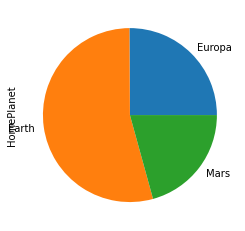

In [7]:
train['HomePlanet'].value_counts(sort=False).plot.pie()
plt.show()

In [8]:
# Fill with most frequent value.
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode().iloc[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(5)
memory usage: 764.2+ KB


In [9]:
# Fill with most frequent value.
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode().iloc[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: bool(1), float64(6), object(5)
memory usage: 371.9+ KB


In [10]:
# Fill with most frequent value.
train['VIP'] = train['VIP'].fillna(train['VIP'].mode().iloc[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


In [11]:
# Fill with most frequent value.
test['VIP'] = test['VIP'].fillna(test['VIP'].mode().iloc[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [12]:
train.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8693 non-null   bool   
 1   Age           8514 non-null   float64
 2   VIP           8693 non-null   bool   
 3   RoomService   8512 non-null   float64
 4   FoodCourt     8510 non-null   float64
 5   ShoppingMall  8485 non-null   float64
 6   Spa           8510 non-null   float64
 7   VRDeck        8505 non-null   float64
 8   Transported   8693 non-null   bool   
dtypes: bool(3), float64(6)
memory usage: 433.1 KB


In [13]:
test.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     4277 non-null   bool   
 1   Age           4186 non-null   float64
 2   VIP           4277 non-null   bool   
 3   RoomService   4195 non-null   float64
 4   FoodCourt     4171 non-null   float64
 5   ShoppingMall  4179 non-null   float64
 6   Spa           4176 non-null   float64
 7   VRDeck        4197 non-null   float64
dtypes: bool(2), float64(6)
memory usage: 209.0 KB


In [14]:
train.fillna(0, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8693 non-null   bool   
 1   Age           8693 non-null   float64
 2   VIP           8693 non-null   bool   
 3   RoomService   8693 non-null   float64
 4   FoodCourt     8693 non-null   float64
 5   ShoppingMall  8693 non-null   float64
 6   Spa           8693 non-null   float64
 7   VRDeck        8693 non-null   float64
 8   Transported   8693 non-null   bool   
dtypes: bool(3), float64(6)
memory usage: 433.1 KB


In [15]:
test.fillna(0, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     4277 non-null   bool   
 1   Age           4277 non-null   float64
 2   VIP           4277 non-null   bool   
 3   RoomService   4277 non-null   float64
 4   FoodCourt     4277 non-null   float64
 5   ShoppingMall  4277 non-null   float64
 6   Spa           4277 non-null   float64
 7   VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6)
memory usage: 209.0 KB


In [16]:
train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [17]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]

In [18]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [19]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
lr_predict = lr.predict(test)
lr_predict

array([ True, False,  True, ...,  True,  True,  True])

In [23]:
passenger_id = pd.read_csv('test.csv')['PassengerId']
passenger_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [24]:
lr_predict = pd.Series(lr_predict)
lr_predict

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273     True
4274     True
4275     True
4276     True
Length: 4277, dtype: bool

In [25]:
result = pd.DataFrame({'PassengerId': passenger_id, 'Transported': lr_predict})
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [26]:
result.to_csv('result.csv', index=False)

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dtc_predict = dtc.predict(test)
dtc_predict

array([ True, False,  True, ...,  True, False,  True])

In [30]:
access = pd.DataFrame({'PassengerId': passenger_id, 'Transported': dtc_predict})
access

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [31]:
access.to_csv('access.csv', index=False)

In [32]:
knc = KNeighborsClassifier()

In [33]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
knc_predict = knc.predict(test)
knc_predict

array([ True, False,  True, ...,  True,  True,  True])

In [35]:
score = pd.DataFrame({'PassengerId': passenger_id, 'Transported': knc_predict})
score

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [36]:
score.to_csv('score.csv', index=False)

In [37]:
data = pd.read_csv('train.csv')

In [38]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

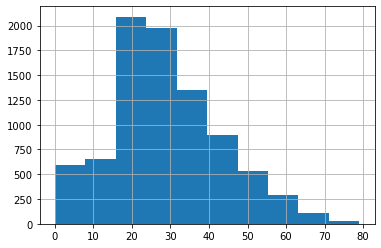

In [40]:
data['Age'].hist()

<AxesSubplot:>

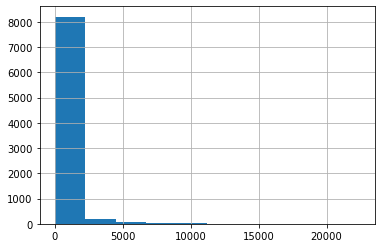

In [41]:
data['Spa'].hist()

<AxesSubplot:>

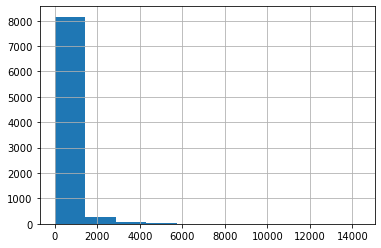

In [42]:
data['RoomService'].hist()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
Rfc = RandomForestClassifier()

In [45]:
Rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
Rfc_predict = Rfc.predict(test)
Rfc_predict

array([ True, False,  True, ...,  True,  True,  True])

In [47]:
book = pd.DataFrame({'PassengerId': passenger_id, 'Transported': Rfc_predict})
book

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [48]:
book.to_csv('book.csv', index=False)

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
Bc = BaggingClassifier()

In [51]:
Bc.fit(X_train, y_train)

BaggingClassifier()

In [52]:
Bc_predict = Bc.predict(test)
Bc_predict

array([ True, False,  True, ...,  True, False,  True])

In [53]:
scole = pd.DataFrame({'PassengerId': passenger_id, 'Transported': Bc_predict})
scole

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [54]:
scole.to_csv('scole.csv', index=False)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(dtc_predict, lr_predict))

              precision    recall  f1-score   support

       False       0.75      0.87      0.81      1757
        True       0.90      0.79      0.84      2520

    accuracy                           0.83      4277
   macro avg       0.82      0.83      0.82      4277
weighted avg       0.84      0.83      0.83      4277

